# RUN WITH footfall_ml_spatial 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint
import branca.colormap as cm
import matplotlib.colors as colors
import contextily as cx

def create_other_features_gdf(fp):
    df = pd.read_csv(fp)
    geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

### Read in sensor data

In [2]:
melbourne_sensors = pd.read_csv("../Cleaned_data/SensorData/sensor_locations.csv")
melbourne_sensors.rename(columns={'sensor_description': 'Name'}, inplace = True)
melbourne_sensors = melbourne_sensors.drop_duplicates('sensor_id', keep='first')

In [3]:
if 'Start' not in  melbourne_sensors.columns:
    sensors_dates_covered = pd.read_csv("../Cleaned_data/SensorData/sensors_dates_covered.csv")
    melbourne_sensors = pd.merge(melbourne_sensors, sensors_dates_covered, on='sensor_id',  how='left')

### Plot

In [4]:
api = "6c2695a3-768a-4885-a408-5770a99f5269"

### SOME OF THE LISTED SENSORS HAVE NO ASSOCIATE DATA

In [5]:
melbourne_sensors = melbourne_sensors[melbourne_sensors['Values_per_sensor']>0]

In [6]:
# from matplotlib_scalebar.scalebar import ScaleBar

# geometry = [Point(xy) for xy in zip(melbourne_sensors.Longitude, melbourne_sensors.Latitude)]
# gdf = gpd.GeoDataFrame(melbourne_sensors, geometry=geometry)
# gdf = gdf.set_crs('EPSG:4326')
# gdf = gdf.to_crs('epsg:3857')

# fig, ax = plt.subplots(figsize=(20,20))
# gdf.plot(column=gdf.Values_per_sensor, ax = ax, markersize = 900,edgecolor = 'black', cmap='Blues', marker='h', legend = True, 
#          legend_kwds={'shrink': 0.9, 'pad':0.01, 'label':'Number of hourly counts', 
#                       "orientation": "horizontal"})

# # Change font size on legend
# cb_ax = fig.axes[1]
# cb_ax.tick_params(labelsize=20)
# plt.rcParams.update({'font.size': 35}) # legend title size

# # Add a scale bar
# # scalebar = ScaleBar(0.08, "m", length_fraction=0.25)
# # scale_bar = ScaleBar(1, location='lower right', length_fraction=0.34, scale_loc='top', 
# #                     height_fraction=0.01) 
# # ax.add_artist(scale_bar)

# scalebar = ScaleBar(1.9, length_fraction=0.20, pad= 0.6,scale_loc='top') # 1 pixel = 0.2 meter
# plt.gca().add_artist(scalebar)


# # gdf2.plot(ax = ax, markersize = 300,color='green')
# # cx.add_basemap(ax,  url = cx.providers.OpenStreetMap.BlackAndWhite, zorder= )    
# cx.add_basemap(ax, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key='+api)
# ax.axis('off')
# ax.set_axis_off()
# # plt.rc('legend',fontsize=500) # using a size in points

# fig.savefig("SensorLocations.PNG", bbox_inches="tight" )

### Plot only post Covid sensors that we use in modelling

In [7]:
sensors_pre_covid = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]

melbourne_sensors_precovid = melbourne_sensors[melbourne_sensors['sensor_id'].isin(sensors_pre_covid) ]
melbourne_sensors_postcovid = melbourne_sensors[~melbourne_sensors['sensor_id'].isin(sensors_pre_covid)]

In [8]:
print(len(melbourne_sensors_postcovid))
print(len(melbourne_sensors_precovid))

39
65


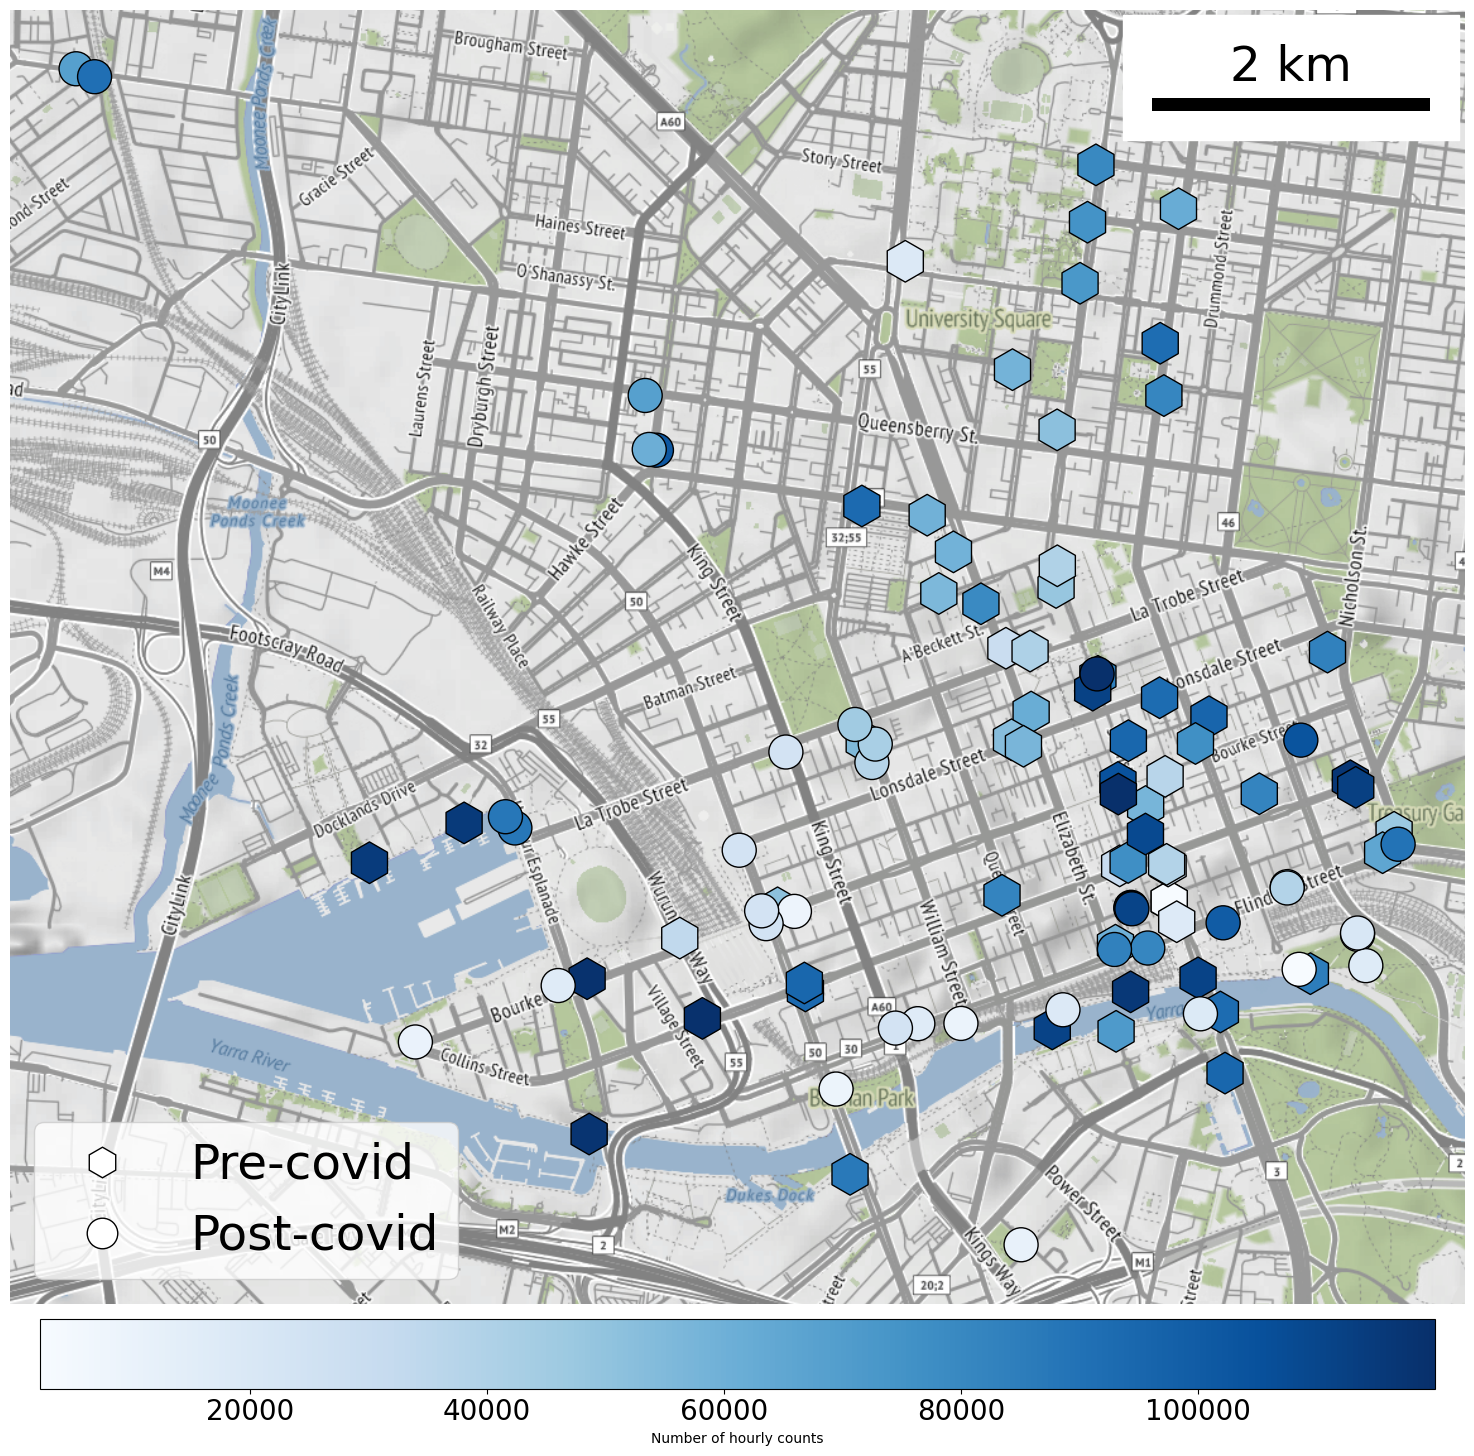

In [9]:
from matplotlib_scalebar.scalebar import ScaleBar

geometry = [Point(xy) for xy in zip(melbourne_sensors_precovid.Longitude, melbourne_sensors_precovid.Latitude)]
gdf = gpd.GeoDataFrame(melbourne_sensors_precovid, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')

fig, ax = plt.subplots(figsize=(20,20))
gdf.plot(column=gdf.Values_per_sensor, ax = ax, markersize = 900,edgecolor = 'black', cmap='Blues', marker='h', legend = True, 
         legend_kwds={'shrink': 0.9, 'pad':0.01, 'label':'Number of hourly counts', 
                      "orientation": "horizontal"})


geometry = [Point(xy) for xy in zip(melbourne_sensors_postcovid.Longitude, melbourne_sensors_postcovid.Latitude)]
gdf = gpd.GeoDataFrame(melbourne_sensors_postcovid, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')

gdf.plot(column=gdf.Values_per_sensor, ax = ax, markersize = 600,edgecolor = 'black', cmap='Blues', marker='o', legend = False)


# Change font size on legend
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 35}) # legend title size

# Add a scale bar
# scalebar = ScaleBar(0.08, "m", length_fraction=0.25)
# scale_bar = ScaleBar(1, location='lower right', length_fraction=0.34, scale_loc='top', 
#                     height_fraction=0.01) 
# ax.add_artist(scale_bar)

scalebar = ScaleBar(1.9, length_fraction=0.20, pad= 0.6,scale_loc='top') # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)


import matplotlib.lines as mlines
import matplotlib.pyplot as plt
blue_star = mlines.Line2D([], [], color='white', marker='h', linestyle='None',  markeredgecolor = "black",
                          markersize=22, label='Pre-covid')
red_square = mlines.Line2D([], [], color='white', marker='o', linestyle='None', markeredgecolor = "black",
                          markersize=22, label='Post-covid')
plt.legend(handles=[blue_star, red_square])



# gdf2.plot(ax = ax, markersize = 300,color='green')
# cx.add_basemap(ax,  url = cx.providers.OpenStreetMap.BlackAndWhite, zorder= )    
cx.add_basemap(ax, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key='+api)
ax.axis('off')
ax.set_axis_off()
# plt.rc('legend',fontsize=500) # using a size in points

fig.savefig("SensorLocations.PNG", bbox_inches="tight" )

**The remainder of the script doesn't work because the hard-coded percentage_outliers onlyb has ~84 values, which matches the number of sensors we used to have, but now there are 100+ sensors**

In [10]:
melbourne_sensors['percentage_outliers'] = [19.8,
 15.4,
 15.8,
 25.2,
 9.4,
 10.4,
 2.1,
 0.0,
 4.7,
 0.0,
 0.1,
 0.2,
 9.7,
 0.0,
 1.5,
 5.1,
 0.1,
 0.0,
 0.0,
 0,
 0.1,
 22.6,
 0.0,
 12.4,
 1.4,
 0.1,
 0,
 6.3,
 1.1,
 0.0,
 0.0,
 9.9,
 0,
 0.0,
 20.3,
 0,
 0,
 53.5,
 0,
 0,
 24.1,
 0,
 0,
 0,
 1.7,
 0,
 2.9,
 0.0,
 0,
 0,
 0,
 0,
 1.7,
 0,
 0.2,
 0,
 5.0,
 1.6,
 0.8,
 32.3,
 0.0,
 0,
 0.0,
 0,
 0.0,
 1.1,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0.0,
 0,
 0.1,
 1.9,
 0,
 0,
 0]

ValueError: Length of values (82) does not match length of index (104)

In [ ]:
melbourne_sensors_precovid['percentage_outliers']

In [ ]:
melbourne_sensors_precovid = melbourne_sensors_precovid.sort_values(by='percentage_outliers')
# melbourne_sensors_precovid = melbourne_sensors_precovid[:-1]
melbourne_sensors_precovid.sort_values(by='percentage_outliers')
plt.hist(melbourne_sensors_precovid['percentage_outliers'], bins=15)

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar

geometry = [Point(xy) for xy in zip(melbourne_sensors_precovid.Longitude, melbourne_sensors_precovid.Latitude)]
gdf = gpd.GeoDataFrame(melbourne_sensors_precovid, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')

fig, ax = plt.subplots(figsize=(20,20))
gdf.plot(column=gdf.percentage_outliers, ax = ax, markersize = 900,edgecolor = 'black', cmap='Blues', marker='h', legend = True, 
             legend_kwds={'shrink': 0.9, 'pad':0.01, 'label':'Percentage of data removed as outliers', 
                      "orientation": "horizontal"})

# Change font size on legend
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 35}) # legend title size

# Add a scale bar
# scalebar = ScaleBar(0.08, "m", length_fraction=0.25)
# scale_bar = ScaleBar(1, location='lower right', length_fraction=0.34, scale_loc='top', 
#                     height_fraction=0.01) 
# ax.add_artist(scale_bar)

scalebar = ScaleBar(1.9, length_fraction=0.20, pad= 0.6,scale_loc='top') # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)


# gdf2.plot(ax = ax, markersize = 300,color='green')
# cx.add_basemap(ax,  url = cx.providers.OpenStreetMap.BlackAndWhite, zorder= )    
cx.add_basemap(ax, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key='+api)
ax.axis('off')
ax.set_axis_off()
# plt.rc('legend',fontsize=500) # using a size in points

# fig.savefig("SensorLocations.PNG", bbox_inches="tight" )